In [270]:
import pandas as pd
import os

ot_odr_filename = os.path.join(".", "OT_ODR.csv.bz2")
ot_odr_df = pd.read_csv(ot_odr_filename, compression="bz2", sep=";")
longueur_ot_odr_df = len(ot_odr_df)

equipements_filename = os.path.join(".", 'EQUIPEMENTS.csv')
equipements_df = pd.read_csv(equipements_filename, sep=";")


In [271]:
equipements_df.tail()


,EQU_ID,MODELE,CONSTRUCTEUR,MOTEUR
4882,E00271009,MD023,C007,MT021
4883,E00341892,MD063,C007,MT023
4884,E00331551,MD005,C000,MT040
4885,E00373890,MD021,C011,MT0-1
4886,E00365136,MD032,C006,MT016


In [272]:
ot_odr_df.tail()

,OT_ID,ODR_ID,ODR_LIBELLE,TYPE_TRAVAIL,DUREE_TRAVAIL,SYSTEM_N1,SYSTEM_N2,SYSTEM_N3,EQU_ID,DATE_OT,KILOMETRAGE,SIG_ORGANE,SIG_CONTEXTE,SIG_OBS,LIGNE
506553,OT000405952,OM000506539,REMPLACEMENT D'UN FEU DE RECUL,ELECTRICITE,0.04,EQUIPEMENT ELECTRIQUE,ECLAIRAGE-SIGNALISATION,ECLAIRAGE-SIGNALISATION EXT,E00040793,2019-09-30 20:38:09,296005.373397,ECLAIRAGE FEUX EXTERIEURS,ARRIERE/EXTERIEUR/DROIT,CASSE,L0283
506554,OT000405953,OM000506546,REMPLACEMENT D'UN ECLAIRAGE EXT,MECANIQUE,0.75,EQUIPEMENT ELECTRIQUE,ECLAIRAGE-SIGNALISATION,ECLAIRAGE-SIGNALISATION EXT,E00274690,2019-09-30 21:21:20,153050.080050,ECLAIRAGE FEUX EXTERIEURS,ARRIERE/LATERAL,CASSE,L0116
506555,OT000405954,OM000506536,REMPLACEMENT D'UN PASSE SANS CONTACT,EQUIPEMENT EMBARQUE,0.03,EQUIPEMENT EMBARQUE,TELEBILLETIQUE,PASSE SANS CONTACT,E00256452,2019-09-30 21:39:29,175063.182439,AVTT,AVANT/PORTE,INTERMITTENT,L0134
506556,OT000405955,OM000506545,REMPLACEMENT D'UNE LAMPE DE FEU DE GABARIT,ELECTRICITE,0.04,EQUIPEMENT ELECTRIQUE,ECLAIRAGE-SIGNALISATION,ECLAIRAGE-SIGNALISATION EXT,E00006122,2019-09-30 21:55:28,437053.614263,ECLAIRAGE FEUX EXTERIEURS,LATERAL/HAUT/GAUCHE,NE FONCTIONNE PAS,L0270
506557,OT000405956,OM000506547,REMPLACEMENT DE LA CASSETTE ENCREUSE D'UN VALIDEUR MAGNETIQUE,EQUIPEMENT EMBARQUE,0.03,EQUIPEMENT EMBARQUE,TELEBILLETIQUE,VALIDEUR MAGNETIQUE,E00315330,2019-09-30 23:43:42,83269.095630,AVTT,POSTE CONDUITE/AVANT,NE FONCTIONNE PAS,L0047


# Liste déroulante pour SIG_CONTEXTE

In [273]:
import pandas as pd

df = pd.DataFrame(ot_odr_df['SIG_CONTEXTE'])

# Création du dictionnaire
dictionnaire = {}

for _, row in df.iterrows():
    sig_contexte = row['SIG_CONTEXTE']
    contexte_parts = sig_contexte.split('/')
    
    # Parcourir les parties du contexte
    current_dict = dictionnaire
    for part in contexte_parts:
        # Vérifier si la partie existe dans le dictionnaire
        if part not in current_dict:
            current_dict[part] = {}
        
        # Passer au dictionnaire interne
        current_dict = current_dict[part]

print(dictionnaire)
print(dictionnaire['LATERAL']['HAUT'])


{'INTERIEUR': {'GAUCHE': {'ARRIERE': {}, 'AVANT': {}, 'CENTRE': {'CENTRALE': {}}, 'DROIT': {}, 'PLATE FORME': {}, 'LATERAL': {}, 'POSTE CONDUITE': {}, 'HAUT': {}, 'TABLEAU DE BORD': {}, 'PLAFOND': {}, 'BAS': {}, 'PORTE': {}, 'EN VIRAGE': {}, 'EXTERIEUR': {}}, 'POSTE CONDUITE': {'AVANT': {}, 'GAUCHE': {}, 'TABLEAU DE BORD': {}, 'EXTERIEUR': {}, 'HAUT': {}, 'ARRIERE': {}, 'PLAFOND': {}, 'BAS': {}, 'DROIT': {}, "A L'OUVERTURE": {}, 'CENTRE': {'CENTRALE': {}}, 'EN MONTEE': {}, 'PORTE': {}, 'AU FREINAGE': {}, 'AU DEMARRAGE': {}, 'PLATE FORME': {}, 'LATERAL': {}, 'A LA FERMETURE': {}, 'A CHAUD': {}, 'AU POINT MORT': {}, 'DESSOUS': {}, 'EN CHARGE': {}}, 'AVANT': {'ARRIERE': {}, 'POSTE CONDUITE': {}, 'DROIT': {}, 'HAUT': {}, 'GAUCHE': {}, 'PORTE': {}, 'TABLEAU DE BORD': {}, 'PLAFOND': {}, 'A CHAUD': {}, "A L'ACCELERATION": {}, 'BAS': {}, 'CENTRE': {'CENTRALE': {}}, 'EXTERIEUR': {}, 'A LA FERMETURE': {}, 'EN MONTEE': {}, "A L'OUVERTURE": {}, 'PLATE FORME': {}, "A L'ARRET": {}, 'AU FREINAGE': {}

## Stocker la liste dictionnaire

In [274]:
import pickle

path = 'liste_deroulante_SIG_CONTEXTE.pkl'

# Sérialisation du dictionnaire
with open(path,'wb') as fichier:
    pickle.dump(dictionnaire, fichier)

# Désérialisation du dictionnaire
with open(path, 'rb') as fichier:
    dictionnaire = pickle.load(fichier)

# Normaliser le texte

### Supprimer les caractères spéciaux

In [275]:
import unicodedata

def Replace_accents(word):
    try:
        word = unicodedata.normalize('NFD', word).encode('ascii', 'ignore').decode('utf-8')
    except:
        pass
    return word


def Delete_special_caractere(word):
    word = Replace_accents(word)
    try:
        word = word.replace('\\', '_').replace('/', '_').replace('-', '_').replace("'", ' ').replace('"', ' ').replace('`', ' ').replace('!', ' ').replace('@', ' ').replace('#', ' ').replace('$', ' ').replace('%', ' ').replace('^', ' ').replace('&', ' ').replace('*', ' ').replace('(', ' ').replace(')', ' ').replace('[', ' ').replace(']', ' ').replace('{', ' ').replace('}', ' ').replace('<', ' ').replace('>', ' ').replace('~', ' ').replace(':', ' ').replace(';', ' ').replace('.', ' ').replace(',', ' ').replace('?', ' ').replace('+', ' ').replace('=', ' ').replace('|', ' ').replace('\\', ' ').replace('\n', ' ').replace('\r', ' ')
    except:
        pass
    return word


In [276]:
ot_odr_df['SIG_ORGANE'].value_counts()

SIG_ORGANE
ECLAIRAGE FEUX EXTERIEURS    189559
CLIGNOTANTS/ DETRESSE         38986
PARE-CHOCS                    33191
RETROVISEUR                   25005
PORTE                         23043
                              ...  
TACHYGRAPHE                       2
LUBRIMATIC                        1
COLMATAGE.F.AIR                   1
PILE BTSAM                        1
ISSUE SEC.                        1
Name: count, Length: 116, dtype: int64

In [277]:
var_cat = ['ODR_LIBELLE', 'TYPE_TRAVAIL',
           'SYSTEM_N1', 'SYSTEM_N2', 'SYSTEM_N3', 
           'SIG_ORGANE', 'SIG_CONTEXTE', 'SIG_OBS', 'LIGNE',
           'SIG_CONTEXTE']
for var in var_cat:
    ot_odr_df[var] = ot_odr_df[var].astype('category')

ot_odr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506558 entries, 0 to 506557
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   OT_ID          506558 non-null  object  
 1   ODR_ID         506558 non-null  object  
 2   ODR_LIBELLE    506558 non-null  category
 3   TYPE_TRAVAIL   506558 non-null  category
 4   DUREE_TRAVAIL  506558 non-null  float64 
 5   SYSTEM_N1      506558 non-null  category
 6   SYSTEM_N2      506558 non-null  category
 7   SYSTEM_N3      506558 non-null  category
 8   EQU_ID         506558 non-null  object  
 9   DATE_OT        506558 non-null  object  
 10  KILOMETRAGE    506557 non-null  float64 
 11  SIG_ORGANE     506558 non-null  category
 12  SIG_CONTEXTE   506558 non-null  category
 13  SIG_OBS        506558 non-null  category
 14  LIGNE          506558 non-null  category
dtypes: category(9), float64(2), object(4)
memory usage: 29.7+ MB


### PyAgrum

In [278]:
!pip install pyAgrum
import pyAgrum as gum

rb_projet =  gum.BayesNet("Projet")


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Creation du réseau

In [279]:
def Create_noeud(nom_du_noeud, ot_odr_df):
    Nombre_element = ot_odr_df[nom_du_noeud].value_counts()
    va = gum.LabelizedVariable(nom_du_noeud, nom_du_noeud, len(Nombre_element))
    i = 0
    for liste in ot_odr_df[nom_du_noeud].unique():
        liste = Delete_special_caractere(liste)
        try:
            va.changeLabel(i, str(liste))
        except gum.DuplicateElement as e:
            i -= 1
            print(f"Erreur de duplication dans le noeud '{nom_du_noeud}' pour la valeur : {liste}")
        i += 1
    return va

## Création des noeud

### Création du noeud de SIG_ORGANE

In [280]:
va_SIG_ORGANE = Create_noeud('SIG_ORGANE',ot_odr_df)


### Création du noeud de SIG_OBS

In [281]:
va_SIG_OBS = Create_noeud('SIG_OBS',ot_odr_df)


### Création du noeud de LIGNE

In [282]:
va_LIGNE = Create_noeud('LIGNE',ot_odr_df)


### Création du noeud de SIG_CONTEXTE

In [283]:
va_SIG_CONTEXTE = Create_noeud('SIG_CONTEXTE',ot_odr_df)


### Création du noeud de SYSTEM_N1

In [284]:
va_SYSTEM_N1 = Create_noeud('SYSTEM_N1',ot_odr_df)

### Création du noeud de SYSTEM_N2

In [285]:
va_SYSTEM_N2 = Create_noeud('SYSTEM_N2',ot_odr_df)

### Création du noeud de SYSTEM_N3

In [286]:
va_SYSTEM_N3 = Create_noeud('SYSTEM_N3',ot_odr_df)

### Création du noeud de TYPE_TRAVAIL

In [287]:
va_TYPE_TRAVAIL = Create_noeud('TYPE_TRAVAIL',ot_odr_df)

### Création du noeud de DUREE_TRAVAIL

In [288]:
va_DUREE_TRAVAIL = Create_noeud('DUREE_TRAVAIL',ot_odr_df)

### Création du noeud de ODR_LIBELLE

In [289]:
va_ODR_LIBELLE = Create_noeud('ODR_LIBELLE',ot_odr_df)

Erreur de duplication dans le noeud 'ODR_LIBELLE' pour la valeur : REMPLACEMENT D UNE GIROUETTE GRAPHIQUE LATERALE AV


### Ajout des noeuds

In [290]:
for va in [va_SIG_ORGANE,va_SYSTEM_N1,va_SYSTEM_N2,va_SYSTEM_N3,va_TYPE_TRAVAIL,va_DUREE_TRAVAIL,va_ODR_LIBELLE,va_SIG_OBS,va_LIGNE,
           va_SIG_CONTEXTE]:
    rb_projet.add(va)

## Création des fixations

In [291]:
rb_projet.addArc("SIG_ORGANE","SYSTEM_N1")
rb_projet.addArc("SIG_OBS","SYSTEM_N1")

rb_projet.addArc("SYSTEM_N1","SYSTEM_N2")
rb_projet.addArc("SYSTEM_N2","SYSTEM_N3")

rb_projet.addArc("SYSTEM_N3","ODR_LIBELLE")
rb_projet.addArc("SYSTEM_N2","ODR_LIBELLE")
rb_projet.addArc("SYSTEM_N1","ODR_LIBELLE")


rb_projet.addArc("ODR_LIBELLE","DUREE_TRAVAIL")
rb_projet.addArc("ODR_LIBELLE","TYPE_TRAVAIL")



# Affichage

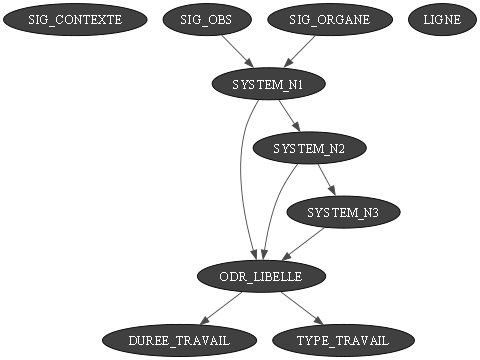

In [292]:
import pyAgrum.lib.ipython as gnb # 

gnb.showBN(rb_projet)


# Calcul des probabilite

In [293]:
def Create_Probabilite(df,element,all_element):
    longueur_df = len(df)
    count_element = []
    for liste in all_element:
        if liste in df[element].unique():
            count_element.append(len(df.loc[df[element] == liste]) / longueur_df)
        else: # On met un 0 si le champ n'est pas remplit, si la probabilité n'existe pas
            count_element.append(0)
    return count_element

### Calcul des probabilité de SIG_ORGANE

In [294]:
rb_projet.cpt("SIG_ORGANE")[:] = Create_Probabilite(ot_odr_df,"SIG_ORGANE",ot_odr_df["SIG_ORGANE"].unique())

rb_projet.cpt("SIG_ORGANE")


(pyAgrum.Potential<double>@0000017037FAEBB0) 
  SIG_ORGANE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

### Calcul des probabilité de SIG_OBS

In [295]:
rb_projet.cpt("SIG_OBS")[:] = Create_Probabilite(ot_odr_df,"SIG_OBS",ot_odr_df["SIG_OBS"].unique())

rb_projet.cpt("SIG_OBS")

(pyAgrum.Potential<double>@0000017037FAEFB0) 
  SIG_OBS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
DEBOITE  |ABSENT   |VIBRE    |CASSE    |BLOQUE   |ENFONCE  |DESSERRE |RAYE     |LACERE   |INTERRUPT|MANQUE   |ODEUR    |CLAQUE   |FERME MAL|FONCTIONN|VOYANT AL|ARRACHE  |NE FONCTI|INSUFFISA|FUITE    |DUR      |FUME_CHAU|ASPIRER  |BRUYANT  |DEGONFLE |VOYANT HS|JEU      |TAGUE    |BRUTAL   |USE_VIDE |INTERMITT|CLIGNOTE |BLESSE   |INCOMPLET|CALE     |FAUX CONT|BAL

### Calcul des probabilité de SIG_CONTEXTE

In [296]:
rb_projet.cpt("SIG_CONTEXTE")[:] = Create_Probabilite(ot_odr_df,"SIG_CONTEXTE",ot_odr_df["SIG_CONTEXTE"].unique())
# Définir la largeur maximale des colonnes

rb_projet.cpt("SIG_CONTEXTE")

(pyAgrum.Potential<double>@0000017037FAF1F0) 
  SIG_CONTEXTE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [297]:
rb_projet.cpt("SIG_CONTEXTE")[{"SIG_CONTEXTE":'INTERIEUR_GAUCHE_ARRIERE'}]

0.00019938486807038878

### Calcul des probabilité de SYSTEM_N1 en fonction de SIG_ORGANE

In [298]:
'''
for liste_SIG in ot_odr_df['SIG_ORGANE'].unique():
    ot_odf_SIG_ORANE = ot_odr_df.loc[ot_odr_df['SIG_ORGANE'] == liste_SIG]
    liste_SIG = Delete_special_caractere(liste_SIG)

    rb_projet.cpt("SYSTEM_N1")[{"SIG_ORGANE":liste_SIG}] = Create_Probabilite(ot_odf_SIG_ORANE,"SYSTEM_N1",ot_odr_df["SYSTEM_N1"].unique())

rb_projet.cpt("SYSTEM_N1")
'''

'\nfor liste_SIG in ot_odr_df[\'SIG_ORGANE\'].unique():\n    ot_odf_SIG_ORANE = ot_odr_df.loc[ot_odr_df[\'SIG_ORGANE\'] == liste_SIG]\n    liste_SIG = Delete_special_caractere(liste_SIG)\n\n    rb_projet.cpt("SYSTEM_N1")[{"SIG_ORGANE":liste_SIG}] = Create_Probabilite(ot_odf_SIG_ORANE,"SYSTEM_N1",ot_odr_df["SYSTEM_N1"].unique())\n\nrb_projet.cpt("SYSTEM_N1")\n'

### Calcul des probabilité de SYSTEM_N1 en fonction de SIG_ORGANE et SIG_OBS

In [299]:
for sig_organe in ot_odr_df['SIG_ORGANE'].unique():
    ot_odf_sig_organe = ot_odr_df.loc[ot_odr_df['SIG_ORGANE'] == sig_organe]
    sig_organe = Delete_special_caractere(sig_organe)
    
    for sig_obs in ot_odr_df['SIG_OBS'].unique():
        ot_odf_sig_obs = ot_odf_sig_organe.loc[ot_odf_sig_organe['SIG_OBS'] == sig_obs]
        sig_obs = Delete_special_caractere(sig_obs)

        rb_projet.cpt("SYSTEM_N1")[{"SIG_ORGANE": sig_organe, "SIG_OBS": sig_obs}] = Create_Probabilite(ot_odf_sig_obs, "SYSTEM_N1", ot_odr_df["SYSTEM_N1"].unique())

print(rb_projet.cpt("SYSTEM_N1"))



             ||  SYSTEM_N1                                                                                        |
SIG_OR|SIG_OB||EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|DIVERS   |
------|------||---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
GLACE_|DEBOIT|| 0.9943  | 0.0057  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
KLAXON|DEBOIT|| 0.2500  | 0.7500  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
VOITUR|DEBOIT|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
PARE_C|DEBOIT|| 0.7202  | 0.2599  | 0.0097  | 0.0005  | 0.0000  | 0.0005  | 0.0087  | 0.0000  | 0.0005  | 0.0000  |
SECURI|DEBOIT|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
VOLANT|DEBOIT|| 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.000

### Calcul des probabilité de SYSTEM_N2 en fonction de SYSTEM_N1

In [300]:
for liste_N1 in ot_odr_df['SYSTEM_N1'].unique():
    ot_odf_SYSTEM_N1 = ot_odr_df.loc[ot_odr_df['SYSTEM_N1'] == liste_N1]
    liste_N1 = Delete_special_caractere(liste_N1)

    rb_projet.cpt("SYSTEM_N2")[{"SYSTEM_N1":liste_N1}] = Create_Probabilite(ot_odf_SYSTEM_N1,"SYSTEM_N2",ot_odr_df["SYSTEM_N2"].unique())
rb_projet.cpt("SYSTEM_N2")

(pyAgrum.Potential<double>@0000017037FAED30) 
      ||  SYSTEM_N2                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
SYSTEM||VITRAGE  |ECLAIRAGE|EQUIPEMEN|ELEMENT C|PORTE    |INFORMATI|VENTILATI|LIAISON A|FREIN D E|ACCESSOIR|MOTEUR TH|DEPOLLUTI|CHASSIS  |FREIN PRI|BOITE DE |ARTICULAT|CIRCUIT D|TRANSMISS|CLIMATISA|CIRCUIT D|AMENAGEME|CIRCUIT D|CIRCUIT D|REFROIDIS|CIRCUIT D|CIRCUIT D|CIRCUIT D|CHAUFFAGE|CIRCUIT D|FREIN DE |_        |POSTE DE |ACCESSIBI|INDICATEU|CIRCUIT D|AIDE A L |STOCKAGE |CIRCUIT D|SECURITE |TELEBILLE|MAINTENAN|ENERGIE T|MOTEUR EL|CIRCUIT D|FREIN SEC|
------||---------|---------|--------

### Calcul des probabilité de SYSTEM_N3 en fonction de SYSTEM_N2

In [301]:
for liste_N2 in ot_odr_df['SYSTEM_N2'].unique():
    ot_odf_SYSTEM_N2 = ot_odr_df.loc[ot_odr_df['SYSTEM_N2'] == liste_N2]
    liste_N2 = Delete_special_caractere(liste_N2)
    rb_projet.cpt("SYSTEM_N3")[{"SYSTEM_N2":liste_N2}] = Create_Probabilite(ot_odf_SYSTEM_N2,"SYSTEM_N3",ot_odr_df["SYSTEM_N3"].unique())
rb_projet.cpt("SYSTEM_N3")

(pyAgrum.Potential<double>@0000017037FAF2B0) 
      ||  SYSTEM_N3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

# Affichage

### Affichage Tableau

In [302]:
def afficher_probabilites_tableau(sig_organe,sig_obs,rb_projet):
    # Définir la valeur choisie pour SIG_ORGANE
    rb_projet.cpt("SIG_ORGANE")[{"SIG_ORGANE": sig_organe, "SIG_OBS": sig_obs}] = 1.0
    colonnes = ot_odr_df['SYSTEM_N1'].unique()
    # Calculer la probabilité conditionnelle pour SYSTEM_N1
    proba_system_n1 = rb_projet.cpt("SYSTEM_N1")[{"SIG_ORGANE": sig_organe, "SIG_OBS": sig_obs}]
    # Déterminer la longueur maximale des noms de colonnes
    longueur_max = max(len(colonne) for colonne in colonnes)

    # Afficher l'en-tête du tableau
    print(f"| {'Variable':<{longueur_max}} | Probabilité |")
    print(f"+{'-' * (longueur_max + 2)}+-------------+")

    # Afficher les lignes du tableau avec les noms de colonnes et les probabilités
    for colonne, probabilite in zip(colonnes, proba_system_n1):
        print(f"| {colonne:<{longueur_max}} | {probabilite:.4f}      |")

    # Afficher la ligne de séparation du tableau
    print(f"+{'-' * (longueur_max + 2)}+-------------+")

sig_organe_choisi = "ECLAIRAGE FEUX EXTERIEURS"
# sig_obs_choisi = "CASSE"
sig_obs_choisi = "NE FONCTIONNE PAS"

afficher_probabilites_tableau(sig_organe_choisi,sig_obs_choisi,rb_projet)

| Variable                   | Probabilité |
+----------------------------+-------------+
| EQUIPEMENT DE CARROSSERIE  | 0.0028      |
| EQUIPEMENT ELECTRIQUE      | 0.9958      |
| EQUIPEMENT CHASSIS         | 0.0001      |
| EQUIPEMENT EMBARQUE        | 0.0004      |
| EQUIPEMENT CLIMATIQUE      | 0.0002      |
| EQUIPEMENT DE FREINAGE     | 0.0001      |
| EQUIPEMENT DE MOTORISATION | 0.0006      |
| EQUIPEMENT DE TRANSMISSION | 0.0000      |
| EQUIPEMENT PNEUMATIQUE     | 0.0001      |
| DIVERS                     | 0.0000      |
+----------------------------+-------------+


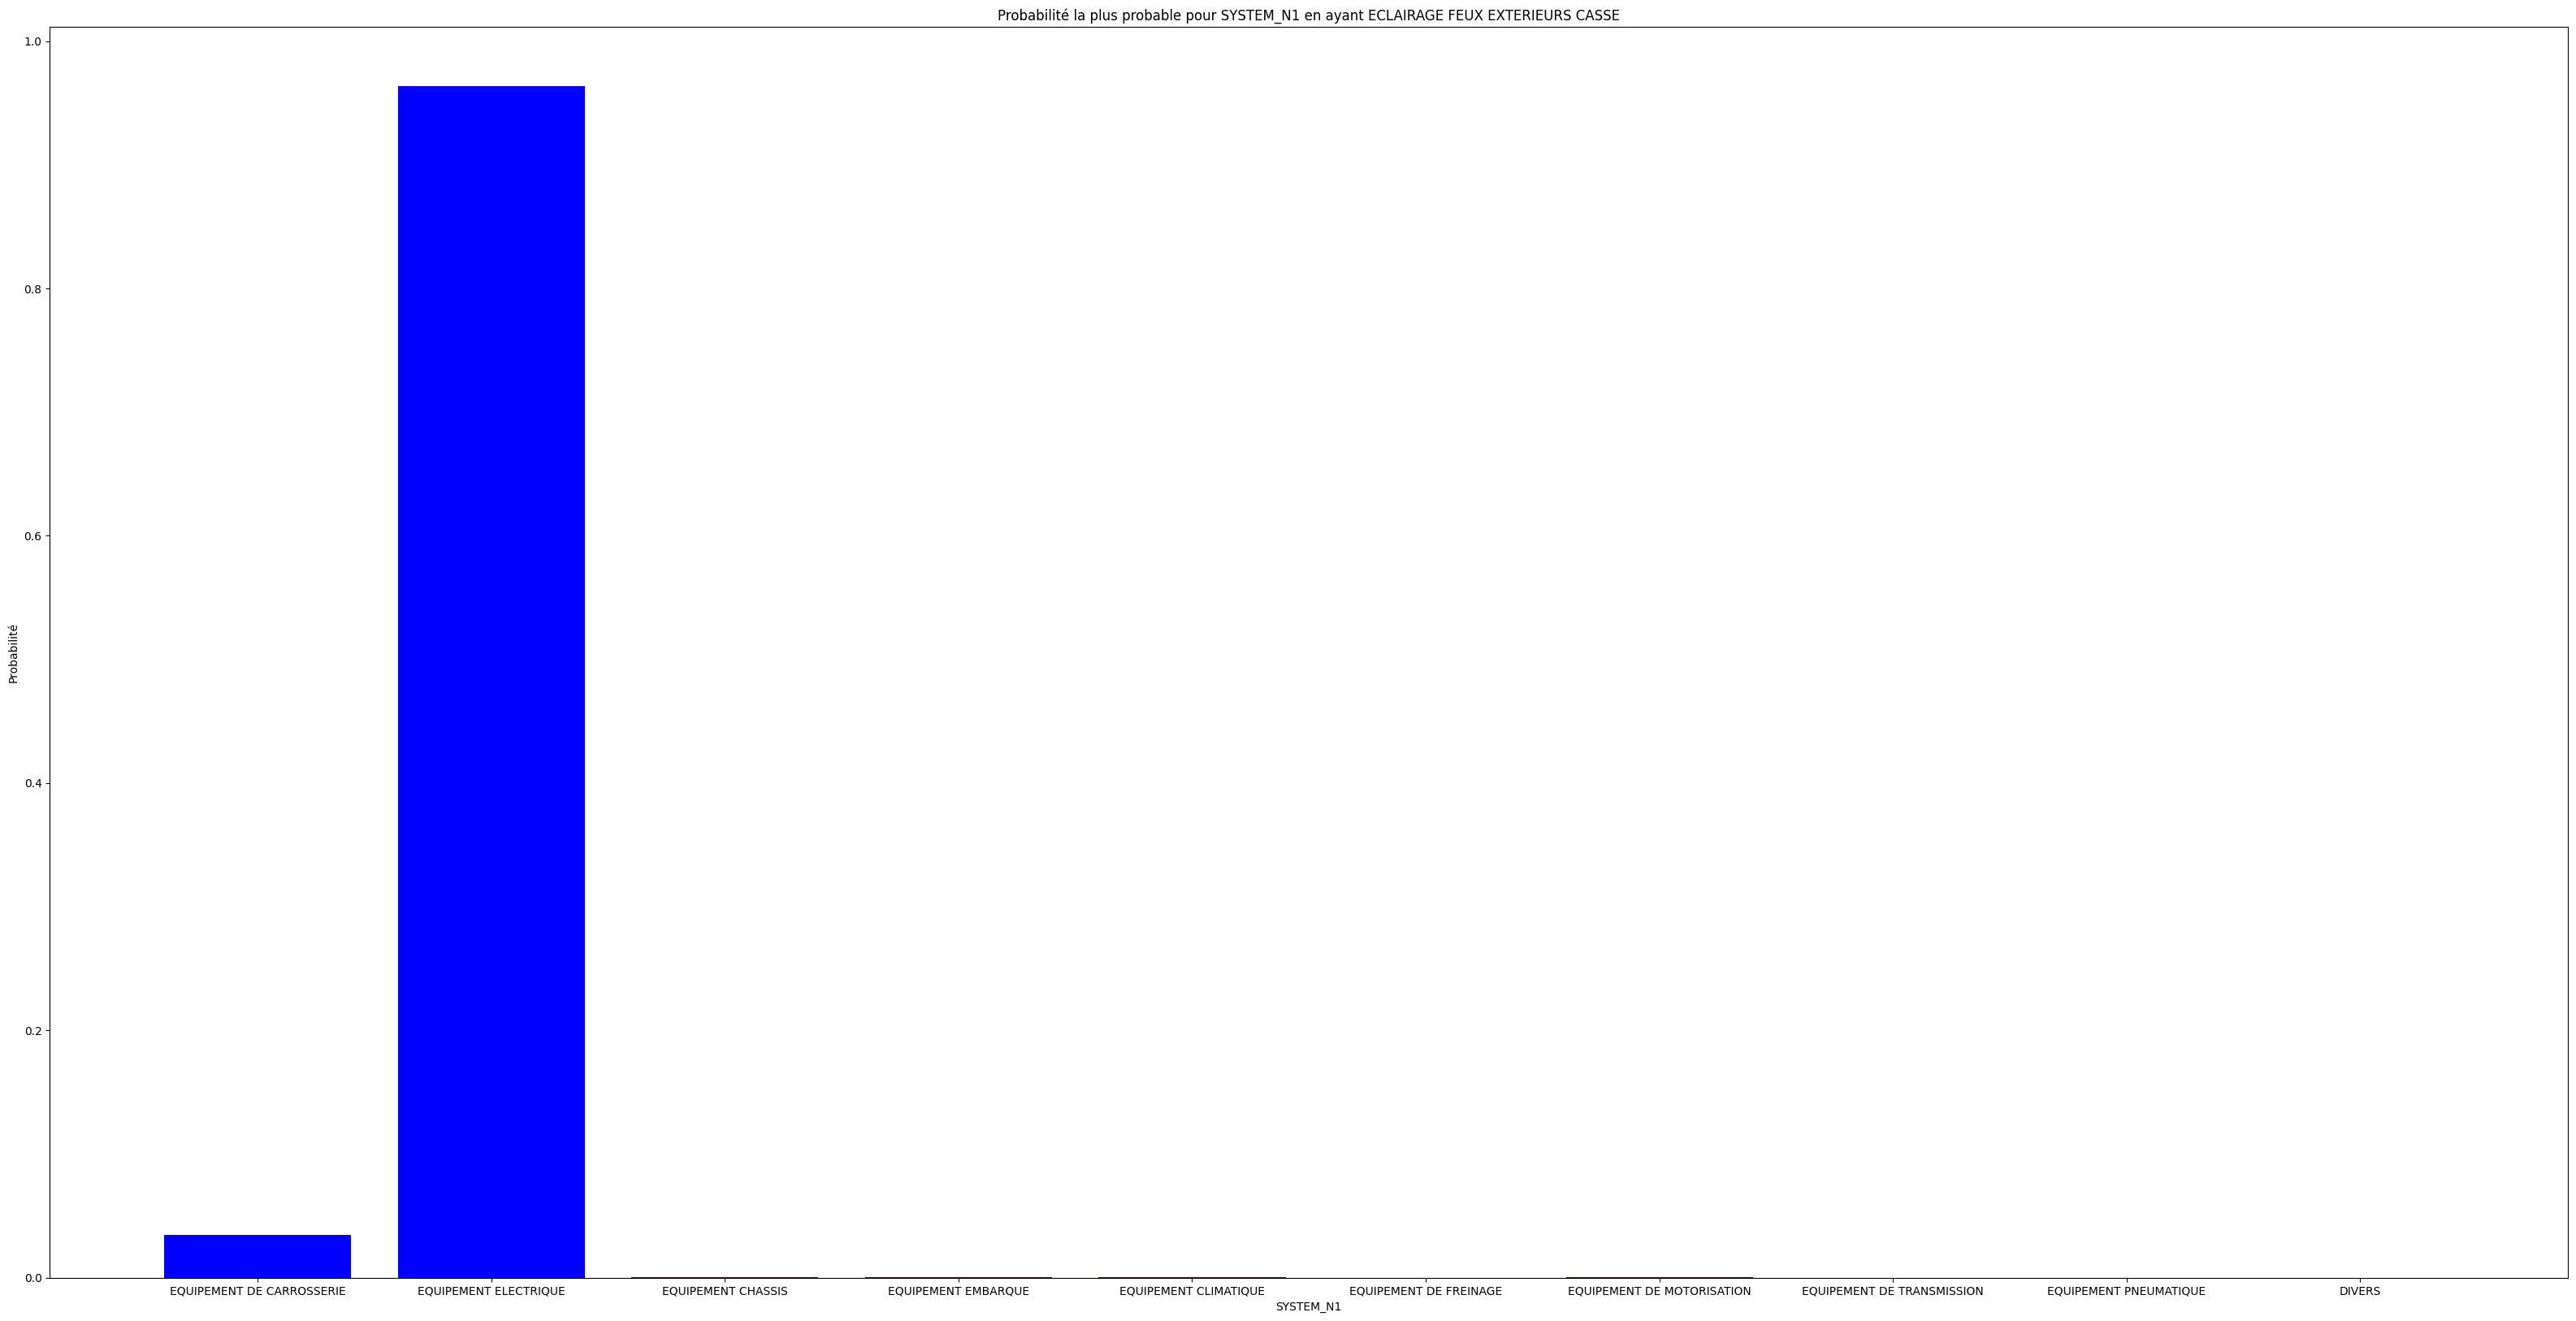

In [303]:
import matplotlib.pyplot as plt

def afficher_probabilites(sig_organe,sig_obs,rb_projet):
    # Définir la valeur choisie pour SIG_ORGANE
    rb_projet.cpt("SIG_ORGANE")[{"SIG_ORGANE": sig_organe, "SIG_OBS": sig_obs}] = 1.0
    colonne = ot_odr_df['SYSTEM_N1'].unique()
    # Calculer la probabilité conditionnelle pour SYSTEM_N1
    proba_system_n1 = rb_projet.cpt("SYSTEM_N1")[{"SIG_ORGANE": sig_organe, "SIG_OBS": sig_obs}]

    # Afficher la probabilité pour SYSTEM_N1 avec une taille de figure plus grande
    plt.figure(figsize=(40, 20))
    plt.bar(colonne, proba_system_n1, color='blue')
    plt.title(str("Probabilité la plus probable pour SYSTEM_N1 en ayant " + sig_organe_choisi + " " + sig_obs))
    plt.xlabel("SYSTEM_N1")
    plt.ylabel("Probabilité")
    plt.show()
    

sig_organe_choisi = "ECLAIRAGE FEUX EXTERIEURS"
sig_obs_choisi = "CASSE"
afficher_probabilites(sig_organe_choisi,sig_obs_choisi,rb_projet)
